# Face Recognition using CNN

 # Step1:
 
At the first, you should import the required libraries:

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

# Step2:

* Load Dataset :

After loading the Dataset you have to normalize every image as an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [14]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
train_x = data['trainX']
#normalize every image
train_x = np.array(train_x,dtype='float32')/255

test_x = data['testX']
test_x = np.array(test_x,dtype='float32')/255

# load the Label of Images
train_y= data['trainY']
test_y= data['testY']

# show the train and test Data format
print('x_train : {}'.format(train_x[:]))
print('Y-train shape: {}'.format(train_y))
print('x_test shape: {}'.format(test_x.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# Step 3

Split DataSet into Train dataset and Validation dataset

Validation DataSet: To reduce overfitting, this data set is employed.You should stop training your neural network if the accuracy of the training data set improves, but the accuracy of the validation data set remains constant or declines.



In [15]:
train_x, valid_x, train_y, valid_y= train_test_split(
    train_x, train_y, test_size=.05, random_state=1234,)

# Step 4

We need to make a change in order to use CNN. Image dimensions must be the same

In [16]:
rows_image=112
cols_image=92
batch_size=512
im_shape=(rows_image, cols_image, 1)

#change the size of images
train_x = train_x.reshape(train_x.shape[0], *im_shape)
test_x = test_x.reshape(test_x.shape[0], *im_shape)
valid_x = valid_x.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(train_y.shape[0]))
print('x_test shape: {}'.format(test_y.shape))

x_train shape: 228
x_test shape: (160,)


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 


In [18]:

#filters= the depth of output image or kernels

cnnModel= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnnModel.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

Show the model's parameters.

In [19]:
cnnModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 2024)              49841000  
_________________________________________________________________
dropout_6 (Dropout)          (None, 2024)             

# Step 6

Train the Model



In [20]:
history=cnnModel.fit(
    np.array(train_x), np.array(train_y), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(valid_x),np.array(valid_y)),
)

Epoch 1/250
1/1 - 64s - loss: 3.0176 - accuracy: 0.0614 - val_loss: 2.9762 - val_accuracy: 0.0833
Epoch 2/250
1/1 - 73s - loss: 2.9916 - accuracy: 0.0658 - val_loss: 2.9865 - val_accuracy: 0.0833
Epoch 3/250
1/1 - 7s - loss: 3.0113 - accuracy: 0.0702 - val_loss: 2.9971 - val_accuracy: 0.0833
Epoch 4/250
1/1 - 3s - loss: 3.0557 - accuracy: 0.0614 - val_loss: 3.0068 - val_accuracy: 0.1667
Epoch 5/250
1/1 - 3s - loss: 3.0289 - accuracy: 0.0395 - val_loss: 3.0184 - val_accuracy: 0.0833
Epoch 6/250
1/1 - 3s - loss: 2.9985 - accuracy: 0.0746 - val_loss: 3.0253 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 - 3s - loss: 3.0458 - accuracy: 0.0395 - val_loss: 3.0301 - val_accuracy: 0.0000e+00
Epoch 8/250
1/1 - 3s - loss: 3.0145 - accuracy: 0.0526 - val_loss: 3.0328 - val_accuracy: 0.0000e+00
Epoch 9/250
1/1 - 3s - loss: 3.0019 - accuracy: 0.0526 - val_loss: 3.0287 - val_accuracy: 0.0000e+00
Epoch 10/250
1/1 - 4s - loss: 2.9929 - accuracy: 0.0570 - val_loss: 3.0218 - val_accuracy: 0.0000e+00
Epoch 1

Epoch 84/250
1/1 - 3s - loss: 0.4343 - accuracy: 0.8904 - val_loss: 0.1343 - val_accuracy: 1.0000
Epoch 85/250
1/1 - 3s - loss: 0.4551 - accuracy: 0.8596 - val_loss: 0.1266 - val_accuracy: 1.0000
Epoch 86/250
1/1 - 4s - loss: 0.4828 - accuracy: 0.8640 - val_loss: 0.1254 - val_accuracy: 1.0000
Epoch 87/250
1/1 - 3s - loss: 0.4439 - accuracy: 0.8947 - val_loss: 0.1486 - val_accuracy: 1.0000
Epoch 88/250
1/1 - 4s - loss: 0.3844 - accuracy: 0.8860 - val_loss: 0.2069 - val_accuracy: 0.9167
Epoch 89/250
1/1 - 4s - loss: 0.3837 - accuracy: 0.8947 - val_loss: 0.2157 - val_accuracy: 0.9167
Epoch 90/250
1/1 - 3s - loss: 0.3200 - accuracy: 0.9211 - val_loss: 0.1493 - val_accuracy: 0.9167
Epoch 91/250
1/1 - 4s - loss: 0.3215 - accuracy: 0.9298 - val_loss: 0.0962 - val_accuracy: 1.0000
Epoch 92/250
1/1 - 4s - loss: 0.3148 - accuracy: 0.9167 - val_loss: 0.0730 - val_accuracy: 1.0000
Epoch 93/250
1/1 - 4s - loss: 0.2709 - accuracy: 0.9298 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 94/250
1/1 - 4

Epoch 167/250
1/1 - 3s - loss: 0.0340 - accuracy: 0.9956 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 168/250
1/1 - 4s - loss: 0.0402 - accuracy: 0.9956 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 169/250
1/1 - 4s - loss: 0.0321 - accuracy: 0.9956 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 170/250
1/1 - 4s - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 171/250
1/1 - 4s - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 172/250
1/1 - 4s - loss: 0.0228 - accuracy: 0.9956 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 173/250
1/1 - 4s - loss: 0.0304 - accuracy: 0.9956 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 174/250
1/1 - 4s - loss: 0.0344 - accuracy: 0.9956 - val_loss: 9.7712e-04 - val_accuracy: 1.0000
Epoch 175/250
1/1 - 3s - loss: 0.0304 - accuracy: 0.9956 - val_loss: 9.3698e-04 - val_accuracy: 1.0000
Epoch 176/250
1/1 - 3s - loss: 0.0411 - accuracy: 0.9868 - val_loss: 0.0011 - val_accuracy: 1.0000
Ep

Epoch 248/250
1/1 - 3s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 3.4722e-04 - val_accuracy: 1.0000
Epoch 249/250
1/1 - 4s - loss: 0.0195 - accuracy: 0.9912 - val_loss: 2.6545e-04 - val_accuracy: 1.0000
Epoch 250/250
1/1 - 3s - loss: 0.0152 - accuracy: 1.0000 - val_loss: 2.3934e-04 - val_accuracy: 1.0000


Evaluate the test data


In [8]:
score = cnnModel.evaluate( np.array(test_x),  np.array(test_y), verbose=0)

print('test los {:.4f}'.format(score[0]))
print('test acc {:.4f}'.format(score[1]))

test los 0.2189
test acc 0.9500


# Step 7 

plot the result

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


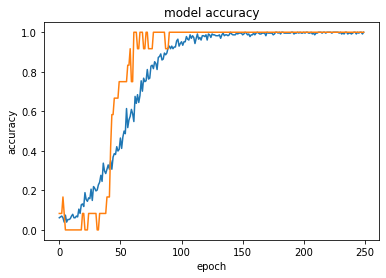

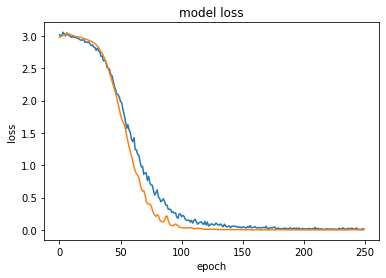

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# step 8

Plot Confusion Matrix

c:\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


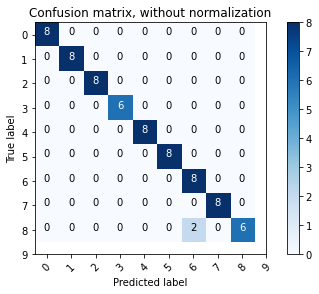

Confusion matrix, without normalization


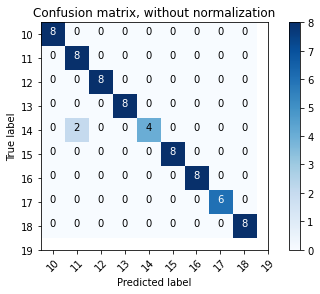

In [22]:
predicted =np.array( cnnModel.predict(test_x))

ynew = cnnModel.predict_classes(test_x)


Acc=accuracy_score(y_test, ynew)

cnf_matrix=confusion_matrix(np.array(test_y), ynew)

y_test1 = np_utils.to_categorical(test_y, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')
